In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Download Dataset

In [ ]:
!kaggle datasets download -d andrewmvd/animal-faces

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/animal-faces
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
100% 696M/696M [00:08<00:00, 126MB/s] 
100% 696M/696M [00:08<00:00, 82.5MB/s]


In [ ]:
import zipfile
zep_ref=zipfile.ZipFile("/content/animal-faces.zip","r")
zep_ref.extractall("/content")
zep_ref.close()

# import Necessary libraries

In [ ]:
import os
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

# Load Dataset

In [ ]:
train_generator=ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_generator=ImageDataGenerator(
    rescale=1/255.0
)

train_data = train_generator.flow_from_directory(
    directory='/content/afhq/train',
    target_size=(255, 255),
    batch_size=64,
    class_mode='categorical'
)

validation_data = validation_generator.flow_from_directory(
    directory='/content/afhq/val',
    target_size=(255, 255),
    batch_size=64,
    class_mode='categorical'
)
train_images, train_labels = train_data.next()
validation_images, validation_labels = train_data.next()

print(f"trian_images :{train_images.shape} ,\ntrian_labels :{train_labels.shape}")
print(f"validation_images :{validation_images.shape} ,\nvalidation_labels :{validation_labels.shape}")

Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
trian_images :(64, 255, 255, 3) ,
trian_labels :(64, 3)
validation_images :(64, 255, 255, 3) ,
validation_labels :(64, 3)


In [ ]:
class_names=['cat','dog','wild']

# define function for displaying image 

In [ ]:
def show_image(train_data, class_names, idx):
    # Generate a batch of images and labels
    batch_images, batch_labels = next(train_data)

    idx = idx % len(batch_images)
    # Display the image
    plt.imshow(batch_images[idx])

    # Interpret the label using class_names
    label_index = batch_labels[idx].argmax()
    plt.title(class_names[label_index])

    plt.show()

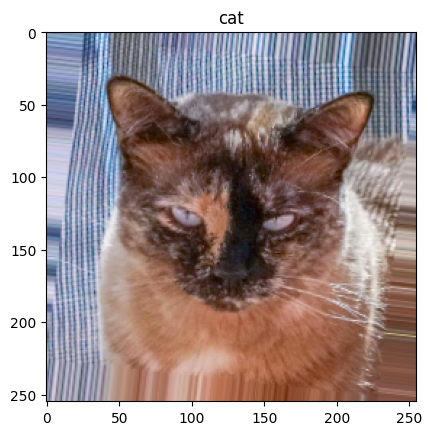

In [ ]:
import random
index = random.randint(0, len(train_data) - 1)

# Show the image with its class name
show_image(train_data, class_names, index)

# it will show random picture form train data

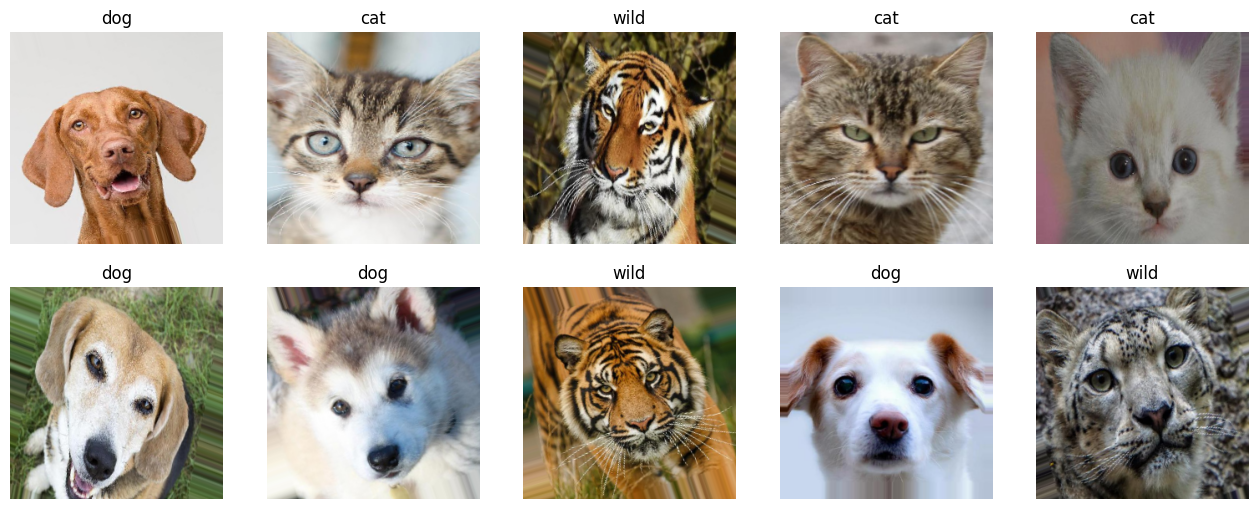

In [ ]:

def show_image(train_data, class_names, num_images=10):

    plt.figure(figsize=(16, 16))

    for i in range(num_images):
        
        batch_images, batch_labels = next(train_data)

        # Display each image
        plt.subplot(5, 5, i + 1)  
        plt.imshow(batch_images[0])  # Display the first image from the batch
        plt.axis('off')

        label_index = batch_labels[0].argmax()
        plt.title(class_names[label_index])

    plt.show()

show_image(train_data, class_names)


In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(255,255,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=3,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data,epochs=10,validation_data=(validation_images,validation_labels))

Epoch 1/10
229/229 [==============================] - 262s 1s/step - loss: 0.4827 - accuracy: 0.8013 - val_loss: 0.1950 - val_accuracy: 0.9375
Epoch 2/10
229/229 [==============================] - 248s 1s/step - loss: 0.1831 - accuracy: 0.9327 - val_loss: 0.1412 - val_accuracy: 0.9531
Epoch 3/10
229/229 [==============================] - 249s 1s/step - loss: 0.1389 - accuracy: 0.9494 - val_loss: 0.1158 - val_accuracy: 0.9688
Epoch 4/10
229/229 [==============================] - 251s 1s/step - loss: 0.1150 - accuracy: 0.9591 - val_loss: 0.1304 - val_accuracy: 0.9375
Epoch 5/10
229/229 [==============================] - 251s 1s/step - loss: 0.1058 - accuracy: 0.9613 - val_loss: 0.1094 - val_accuracy: 0.9531
Epoch 6/10
229/229 [==============================] - 246s 1s/step - loss: 0.0946 - accuracy: 0.9649 - val_loss: 0.0596 - val_accuracy: 0.9844
Epoch 7/10
229/229 [==============================] - 250s 1s/step - loss: 0.0803 - accuracy: 0.9715 - val_loss: 0.0370 - val_accuracy: 1.0000

# Calculate loss

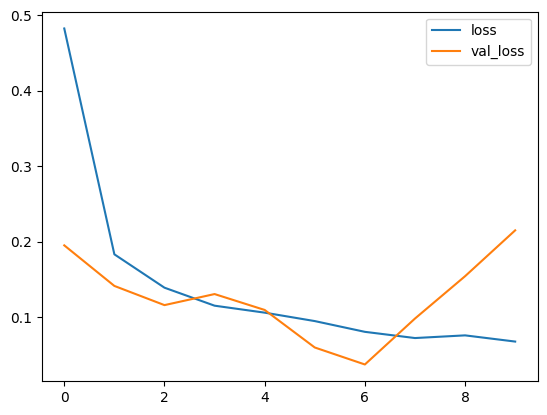

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

# Calculate accuracy

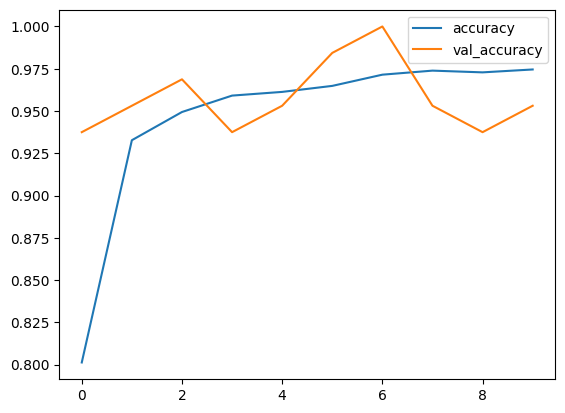

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()


In [ ]:
model.save('train_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
